## 2. Clustering

Creating 3 toy datasets by using:
- make_blobs()
- make_classification(”n_clusters_per_class=1”)
- make_circles(”noise=0.3”)

Each dataset will have:
- 1000 examples/instances
- 2 input features (for "make_classification", "n_informative=2")

Keep other hyperparameters as default.

Set the seed in the dataset generators to get reproducible results.

Trying out 7 clustering algorithms:
1. K-Means
2. Affinity Propagation
3. DDBSCAN
4. Gaussian Mixture Model
5. BIRCH
6. Agglomerative Clustering
7. Mean Shift

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification, make_circles

## Centroid clustering/Partitioning clustering
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
## Density clustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import DBSCAN
## Connectivity clustering
from sklearn.cluster import AgglomerativeClustering # Hierarchical
from sklearn.cluster import Birch
## Distribution clustering
from sklearn.mixture import GaussianMixture


In [3]:
seed = 42
n_samples = 1000

X_blob, y_blob = make_blobs(n_samples=n_samples, n_features=2, random_state=seed)
X_cls, y_cls = make_classification(n_samples=n_samples, n_clusters_per_class=1, n_informative=2, random_state=seed)
X_circle, y_circle = make_circles(n_samples=1000, noise=0.3, random_state=seed)

In [4]:
## K-Means
kmeans = KMeans(random_state=2)
kmeans.fit(X_blob)

## Mean Shift
ms_clustering = MeanShift()
ms_clustering.fit(X_blob)

## Affinity Propagation
af_clustering = AffinityPropagation(random_state=seed)
af_clustering.fit(X_blob)

## DBSCAN
db_clustering = DBSCAN()
db_clustering.fit(X_blob)

## Hierarchical Agglomerative Clustering
agg_clustering = AgglomerativeClustering()
agg_clustering.fit(X_blob)

## BIRCH
brc_clustering = Birch()
brc_clustering.fit(X_blob)

## Gaussian Mixture
gm_clustering = GaussianMixture(random_state=seed)
gm_clustering.fit(X_blob)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:250: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


GaussianMixture(random_state=42)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:250: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid 

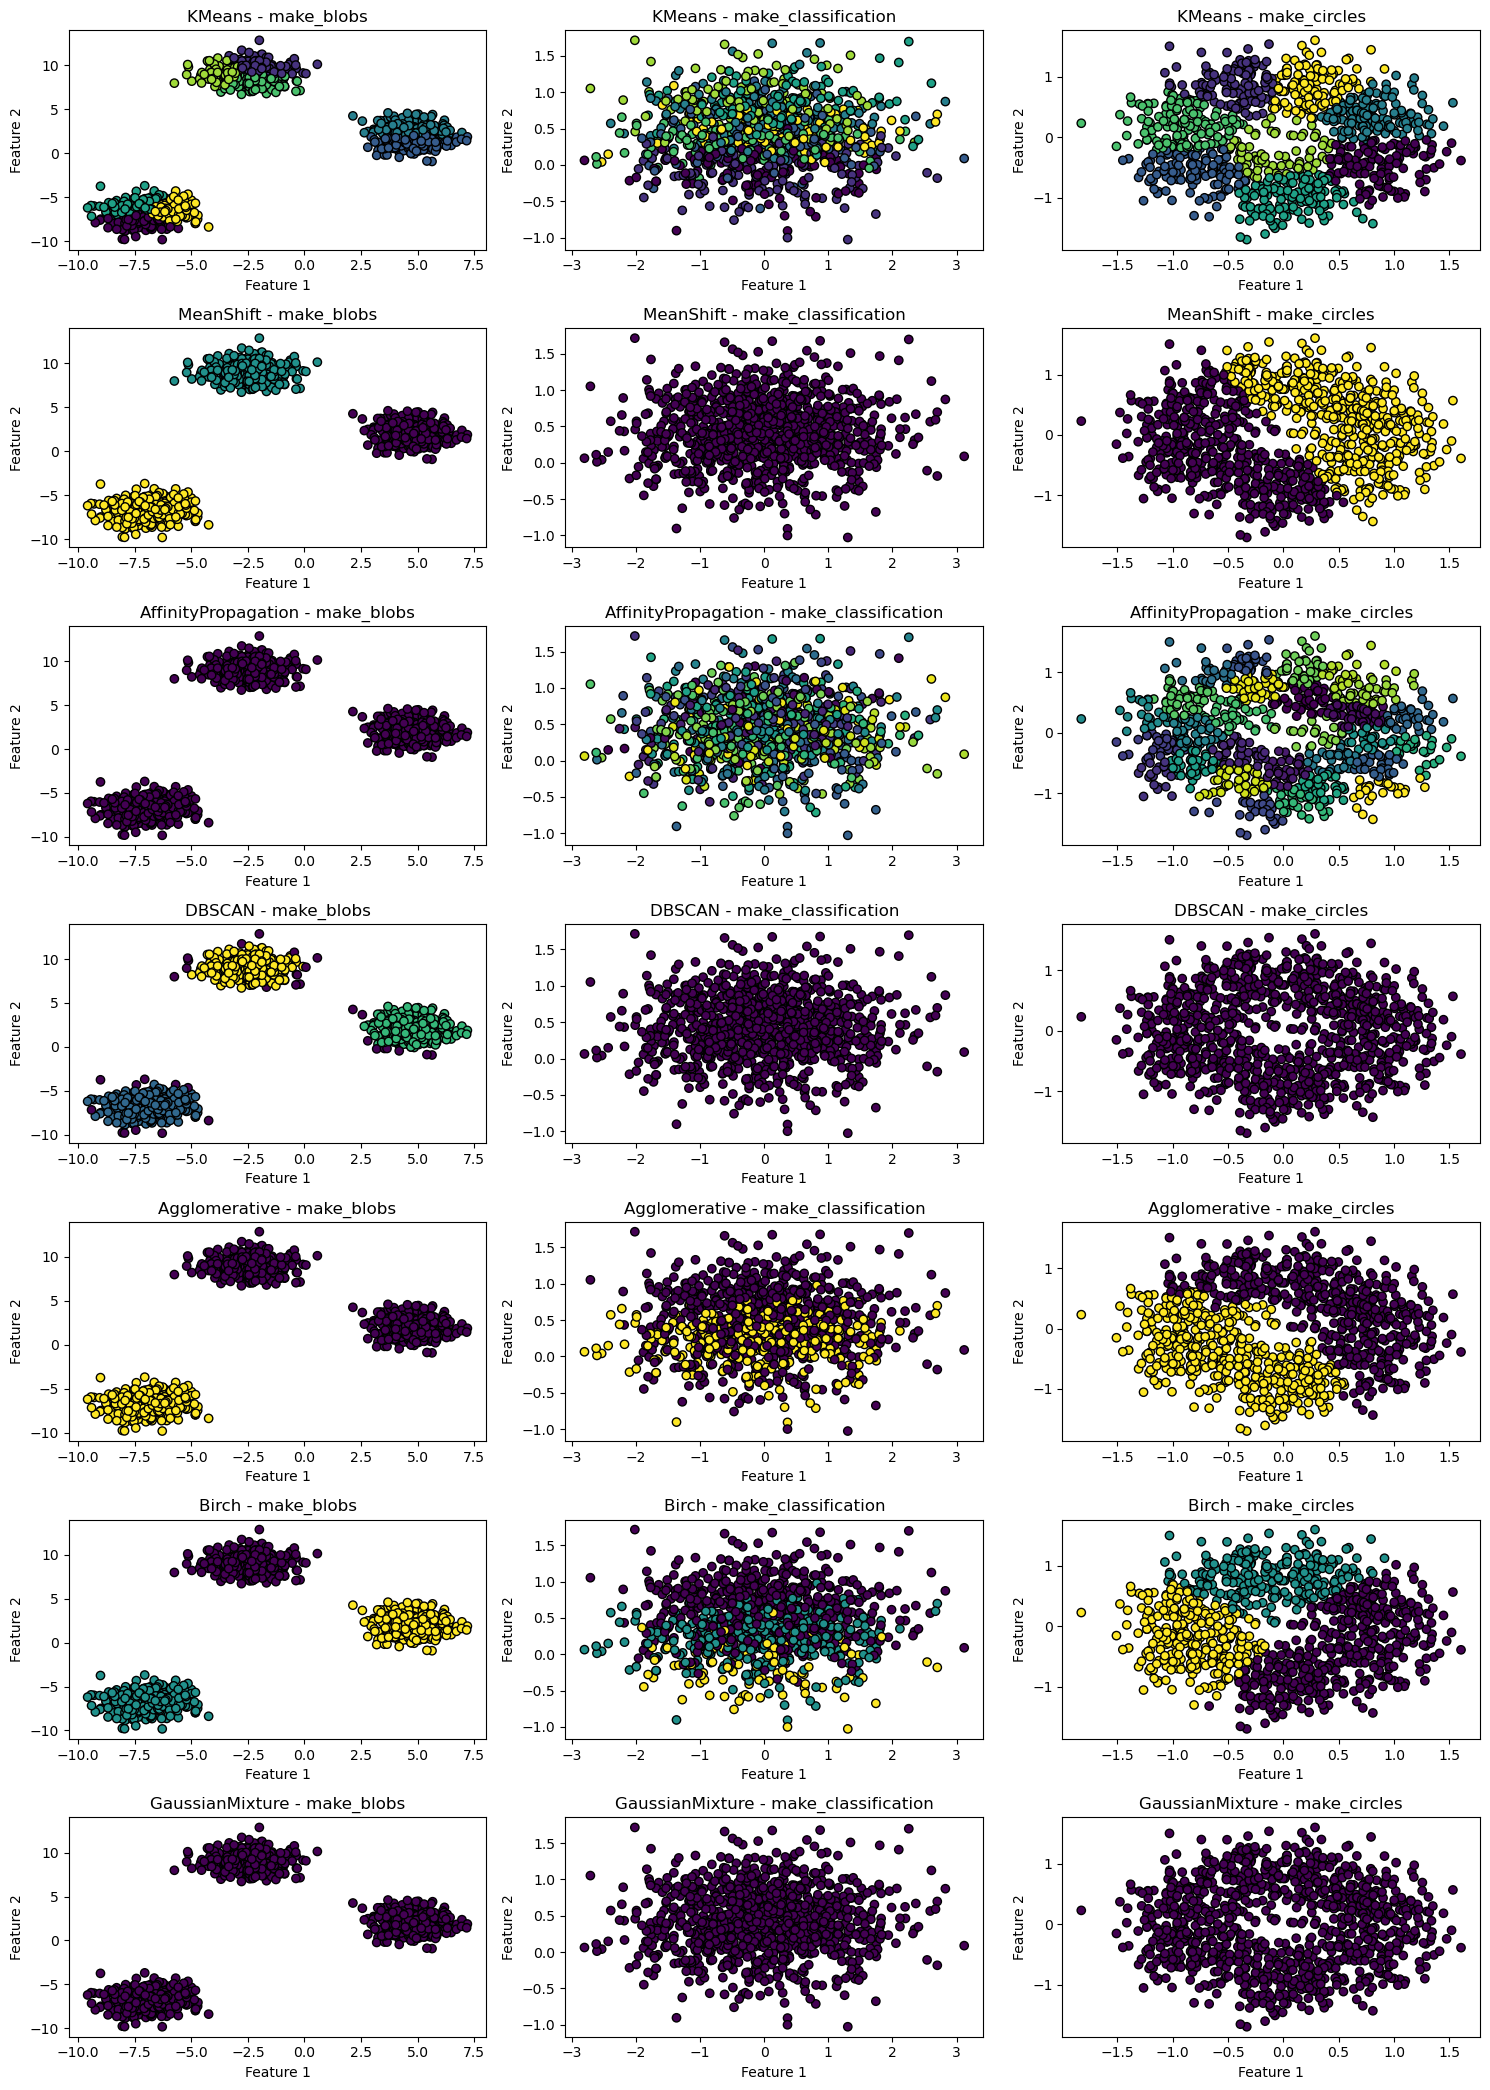

In [8]:
# List of clustering algorithms
clustering_algorithms = [
    ("KMeans", KMeans(random_state=seed)),
    ("MeanShift", MeanShift()),
    
    ("AffinityPropagation", AffinityPropagation(random_state=seed)),
    ("DBSCAN", DBSCAN()),
    
    ("Agglomerative", AgglomerativeClustering()),
    ("Birch", Birch()),
    
    ("GaussianMixture", GaussianMixture(random_state=seed))
]

# Draw scatter plots for each combination of algorithm and dataset
fig, axes = plt.subplots(7, 3, figsize=(15, 21))
for i, (algo_name, algo) in enumerate(clustering_algorithms):
    for j, dataset in enumerate([(X_blob, "make_blobs"), (X_cls, "make_classification"), (X_circle, "make_circles")]):
        X, dataset_name = dataset
        y = algo.fit_predict(X)
        axes[i, j].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
        axes[i, j].set_title(f"{algo_name} - {dataset_name}")
        axes[i, j].set_xlabel('Feature 1')
        axes[i, j].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()
